In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from functools import reduce
import re as re
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [55]:
sns.__version__

'0.9.0'

In [56]:
# Loading all "csv" files.
# I named the files as per the orginal name associated with "csv" files.
framenames =[]
varsname =[]
for file in os.listdir("DataSet"):    
    if file.endswith(".csv"):
        filepath = os.path.join("DataSet", file)
        name = [i.split(".") for i in file.split("_")]
        name = reduce(lambda x, y: x + y ,name)[:-1]
        name = "_".join(name)
        vars()[name] = pd.read_csv(filepath, encoding = 'unicode_escape')
        print(name)
        framenames.append(name)
        varsname.append(vars()[name])

application_test
HomeCredit_columns_description
POS_CASH_balance
credit_card_balance
installments_payments
application_train
bureau
previous_application
bureau_balance
sample_submission


In [57]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [58]:
application_test = reduce_mem(application_test)
HomeCredit_columns_description = reduce_mem(HomeCredit_columns_description )
POS_CASH_balance = reduce_mem(POS_CASH_balance)
credit_card_balance = reduce_mem(credit_card_balance)
installments_payments = reduce_mem(installments_payments)
application_train = reduce_mem(application_train)
bureau= reduce_mem(bureau)
previous_application = reduce_mem(previous_application )
bureau_balance = reduce_mem(bureau_balance)

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%
Memory usage of dataframe is 0.01 MB
Memory usage after optimization is: 0.01 MB
Decreased by 14.9%
Memory usage of dataframe is 610.43 MB
Memory usage after optimization is: 238.45 MB
Decreased by 60.9%
Memory usage of dataframe is 673.88 MB
Memory usage after optimization is: 289.33 MB
Decreased by 57.1%
Memory usage of dataframe is 830.41 MB
Memory usage after optimization is: 311.40 MB
Decreased by 62.5%
Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%
Memory usage of dataframe is 222.62 MB
Memory usage after optimization is: 112.95 MB
Decreased by 49.3%
Memory usage of dataframe is 471.48 MB
Memory usage after optimization is: 309.01 MB
Decreased by 34.5%
Memory usage of dataframe is 624.85 MB
Memory usage after optimization is: 338.46 MB
Decreased by 45.8%


In [5]:
dfs =  [application_test,HomeCredit_columns_description,POS_CASH_balance,credit_card_balance,installments_payments,
       application_train,bureau, previous_application, bureau_balance, sample_submission]



## EDA of application_train

In [59]:
train= application_train.copy()
test = application_test.copy()
train.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.0,265992.0,265992.0
mean,278180.518577,0.080729,0.417052,1.687391e+05,5.988308e+05,27110.958984,5.379796e+05,0.020859,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006401,0.007000,0.034302,NaN,NaN,NaN
std,102790.175348,0.272419,0.722121,2.371759e+05,4.024795e+05,14493.233398,3.695427e+05,0.013824,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083984,0.110718,0.204712,0.0,NaN,0.0
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010010,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018845,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028656,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.0
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072510,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.0,261.0,25.0


In [ ]:
def set_axes_height(ax, h):
    fig = ax.figure
    aw, ah = np.diff(ax.transAxes.transform([(0, 0), (1, 1)]), axis=0)[0]
    fw, fh = fig.get_size_inches()
    dpi = fig.get_dpi()
    scale = h / (ah / dpi)
    fig.set_size_inches(fw*scale, fh*scale, forward=True)


#### Exploring the missing values

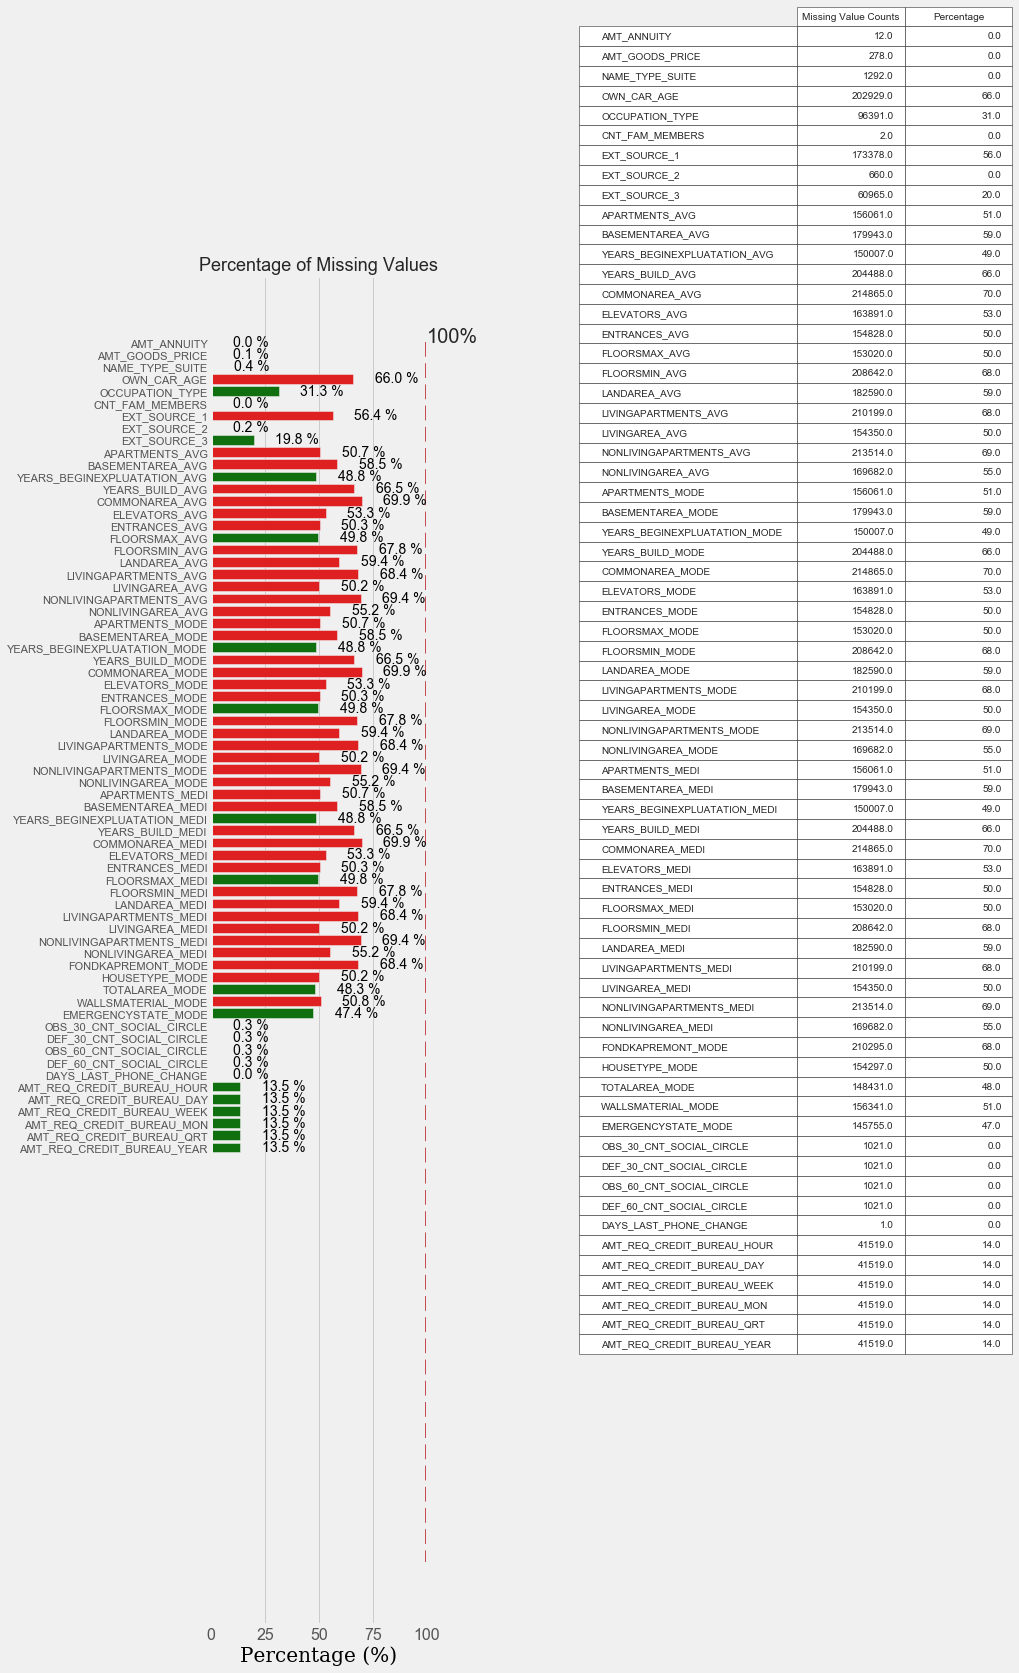

In [82]:
def missing_values(df, figsize=(10, 20)):
    plt.style.use('fivethirtyeight')
    misval= df.isnull().sum()
    df_misval = pd.DataFrame(misval[misval!=0])
    df_misval.columns = ['frequency']
    df_misval["percentage"] = (df_misval/len(df))*100
    #df_misval =df_misval
    
    # If there are more than 50 % values are missing, it will appear as red. 
    colors = ['red' if (x > 50.00) else 'green' for x in df_misval['percentage']]
    # Now Plotting missing values as well as the dataframe
    f, (ax1, ax2) = plt.subplots(1,2, figsize=figsize)

    b= sns.barplot(x= "percentage", y = df_misval.index,
                data = df_misval, palette=colors, label = "biggest", ax = ax1)
    font = {'family': 'serif','color':  'black', 'weight': 'normal','size': 20}
    b.set_xlim(0,100)
    b.set_xlabel("Percentage (%)", fontdict = font)
    b.set_title("Percentage of Missing Values", fontsize = 18)
    b.vlines(x= 100, ymin =0, ymax=100, color='r', linestyle='--', label = "100%")
    # Annotaing
    an = b.annotate('100%', xy=(100, 0),fontsize=20)
    
    # Annotaing the acutal number
    for index, row in df_misval.reset_index().iterrows():
        b.text(10+row.percentage,row.name, str(round(row.percentage,1)) + " %", color='black', va="center")
    ax1.tick_params(axis = 'x', which = 'both', labelsize = 16)

    # adding the data frame as a subplot
    bbox=[1.5, 0.2, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = np.round(df_misval.values),
                          rowLabels = df_misval.index,
                         bbox = bbox, colLabels=["Missing Value Counts", "Percentage"],
                          colLoc='center')
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(10)
    #sns.set(font_scale = 1)

    plt.rc("font")
    plt.tight_layout()
    f.tight_layout()
    plt.savefig("missing_values.pdf", dpi=300,
                bbox_extra_artists=(b, mpl_table,an), bbox_inches='tight' )
    
    return ax1, ax2

ax1,ax2 = missing_values(train)

In [80]:
def set_axes_height(ax, h):
    fig = ax.figure
    aw, ah = np.diff(ax.transAxes.transform([(0, 0), (1, 1)]), axis=0)[0]
    fw, fh = fig.get_size_inches()
    dpi = fig.get_dpi()
    scale = h / (ah / dpi)
    fig.set_size_inches(fw*scale, fh*scale, forward=True)
set_axes_height(ax1, 10)

There are lot of missing values; for some columns it is over 50% (shown as red). we need to deal with the missing values before building up machine learning models and we need to deal with it separately for int and object columns. So let's see what object columns contain missing values:


##### Missing values for object  or categorical columns

##### Distribution of unique classes in object columns

Number of Unique categories in the object columns: 

 NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               19
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             5
HOUSETYPE_MODE                 4
WALLSMATERIAL_MODE             8
EMERGENCYSTATE_MODE            3
dtype: int64 

Distribution of Category Variables:



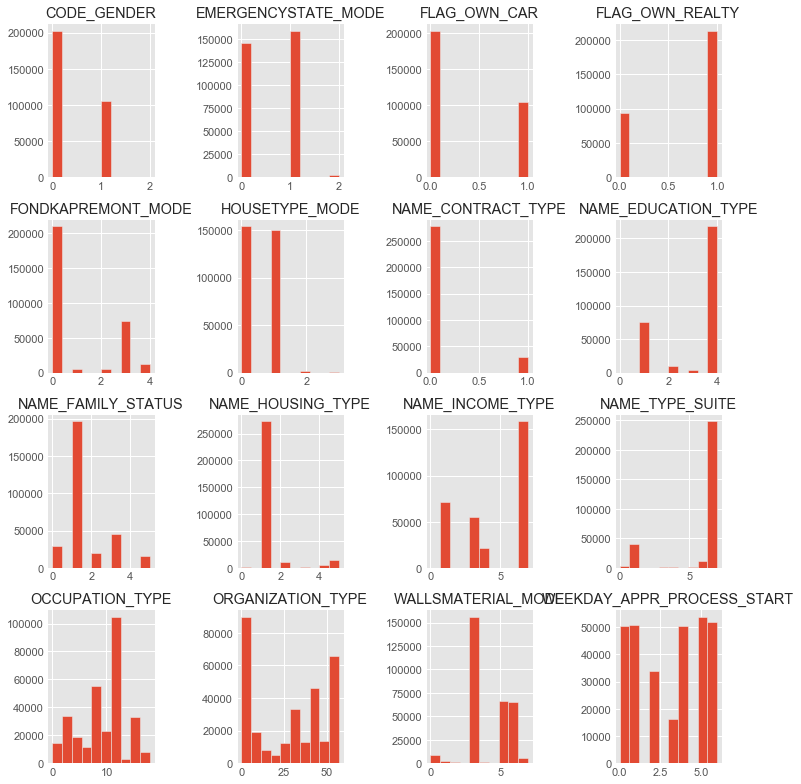

In [65]:
def category_distribution(df):
    # Selecting object columns
    plt.style.use('ggplot')
    le = LabelEncoder()
    train_object = df.select_dtypes(include ="object")
    object_columns = application_train.select_dtypes(include ="object").columns
    # Converting np.nan to "NAN"
    for i in object_columns:
        train_object[i].replace(np.nan, 'NaN', inplace=True)
    # Applying label_encoder
    train_object_le= train_object.apply(le.fit_transform)

    train_object_le.hist(figsize=[11,11])
    plt.tight_layout()
    # Number of unique classes in each class object
    print("Number of Unique categories in the object columns:", "\n\n",train_object.apply(pd.Series.nunique, axis = 0),"\n")
    print("Distribution of Category Variables:\n")
category_distribution(train)

(<matplotlib.axes._subplots.AxesSubplot at 0x1a1ba96438>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1bad57f0>)

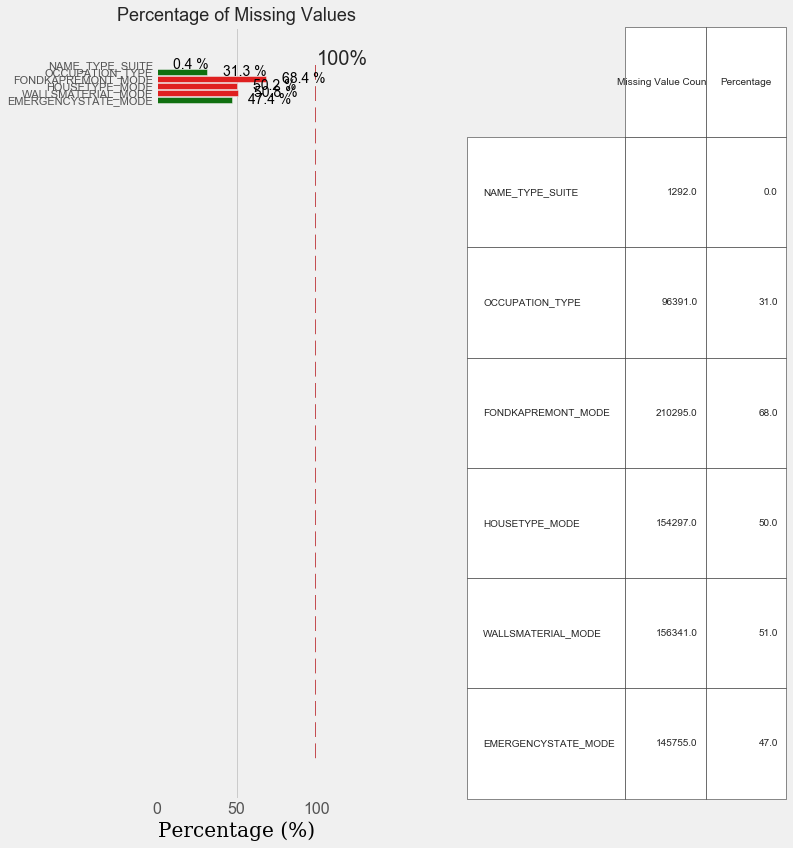

In [70]:
missing_values(train.select_dtypes(include ="object"),figsize=(8,12))

In [127]:
num_cols = train.select_dtypes(exclude ="object").columns
len(num_cols)

106

In [121]:
len(num_cols)

122

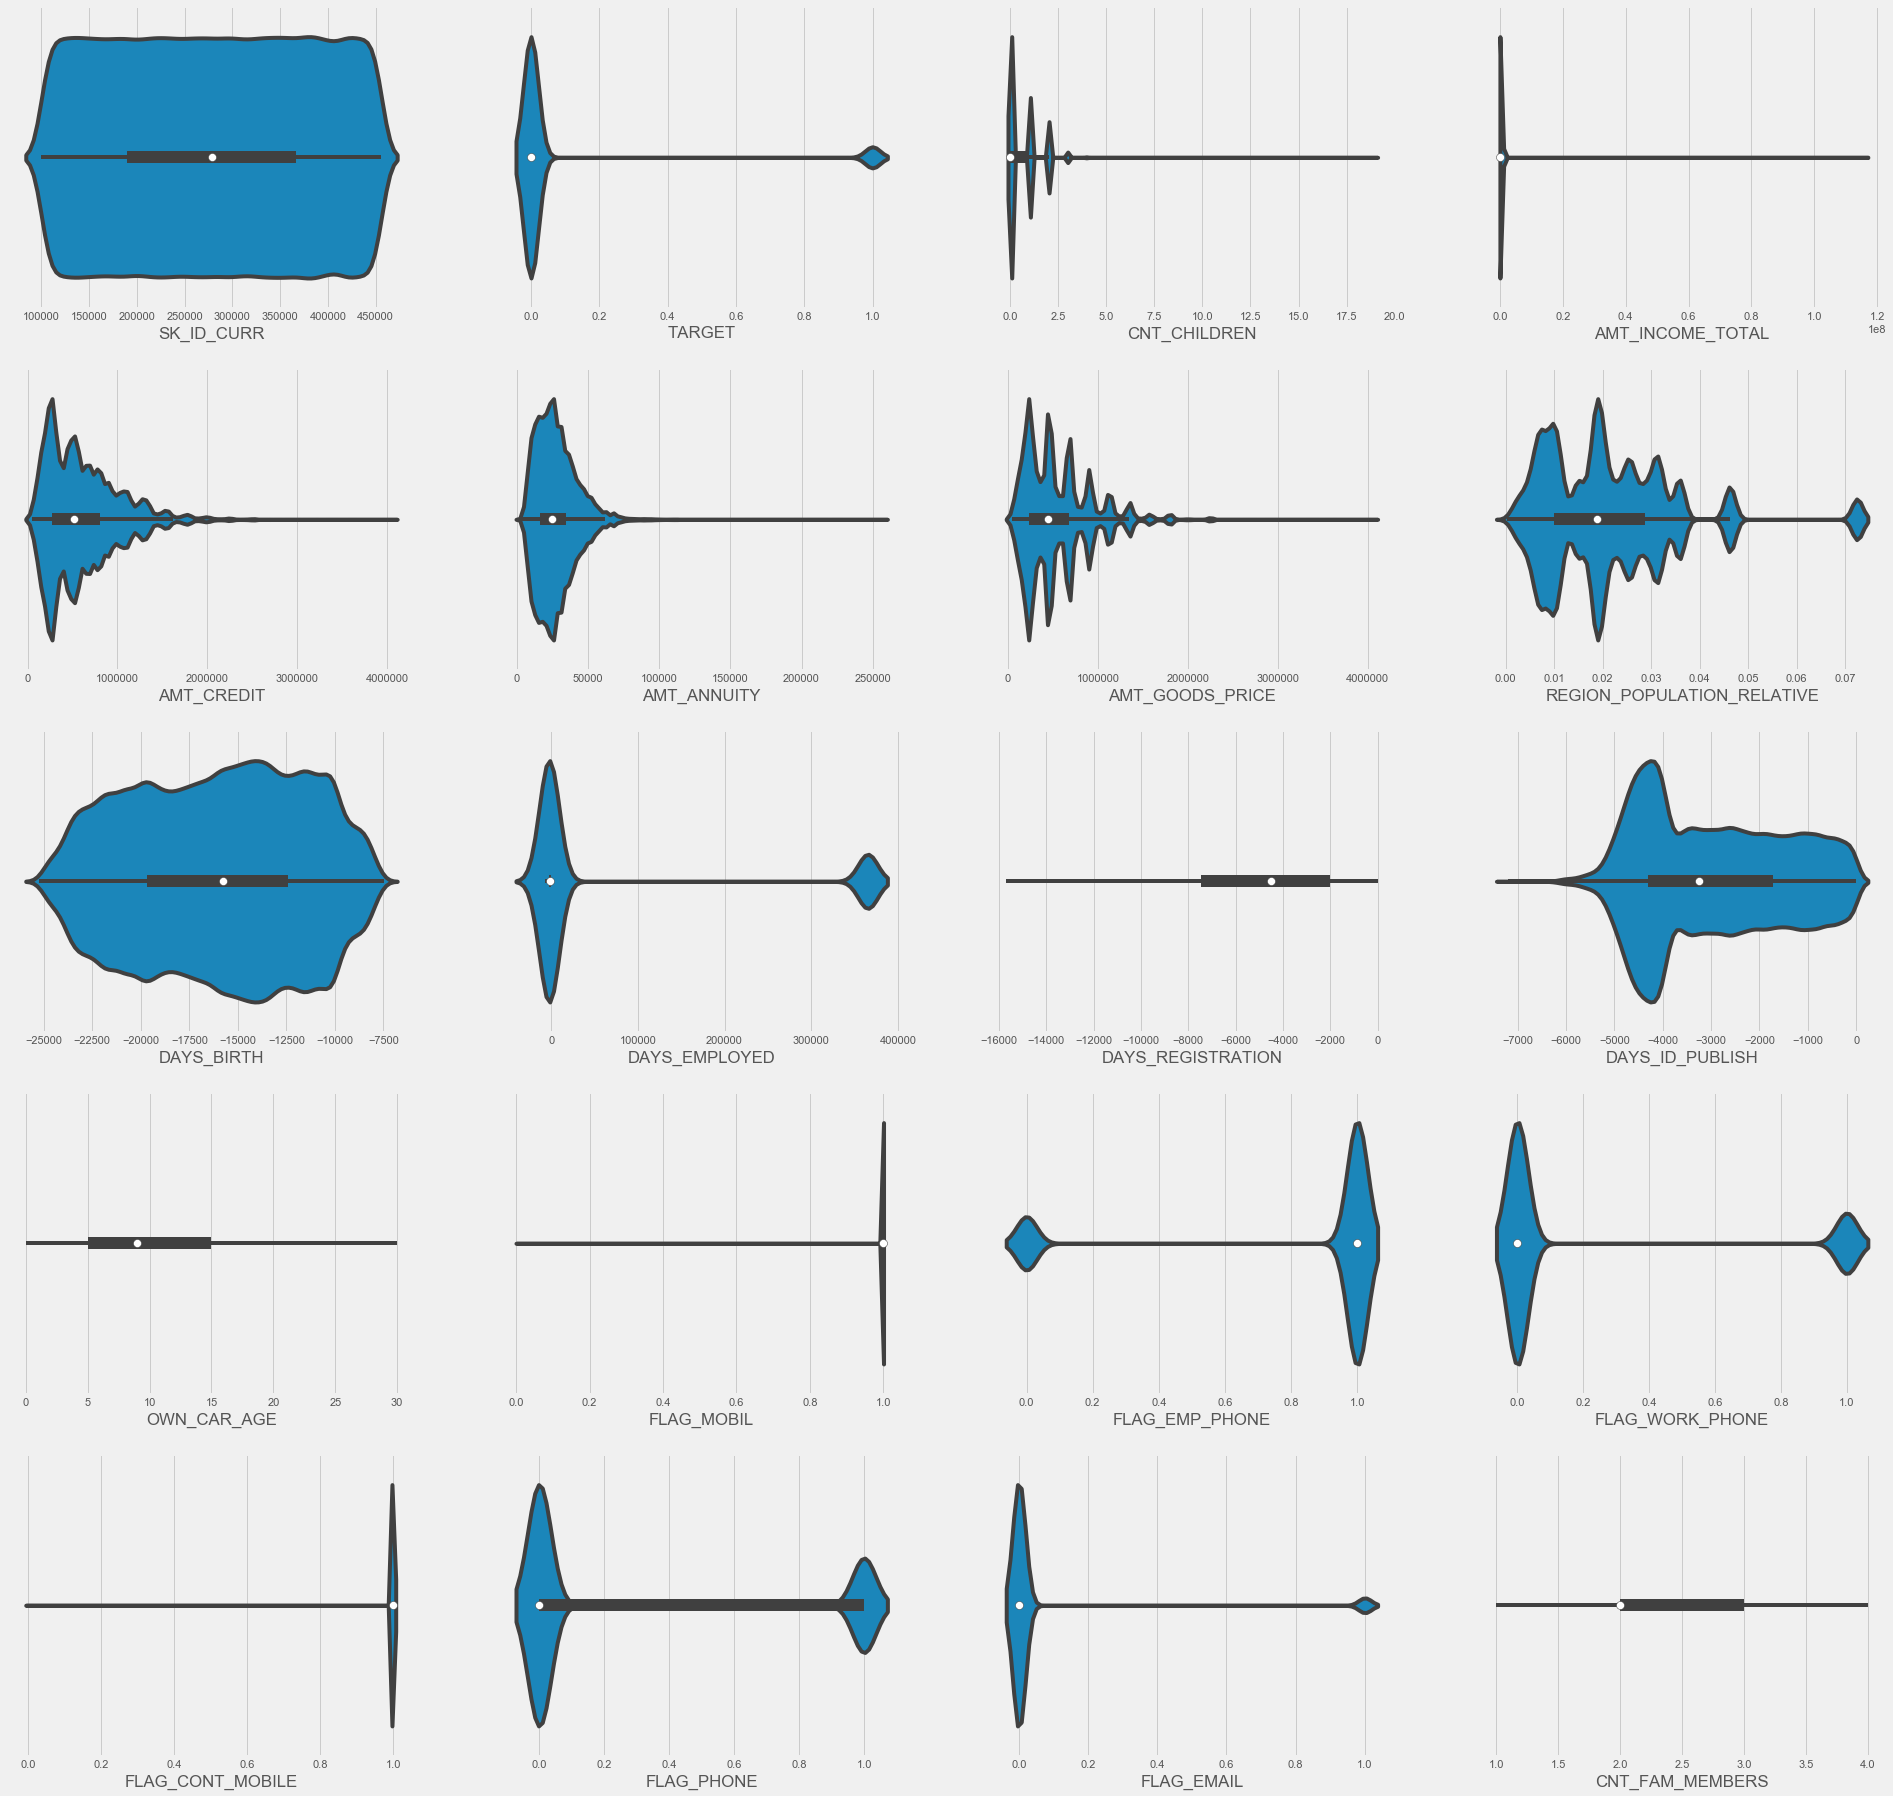

In [129]:
def violinplot(df, cols):
    plt.figure(figsize =(30,30))
    for idx, ft in enumerate(cols):

        plt.subplot(len(cols)/4,4, idx+1)
        sns.violinplot(x=df[ft])
violinplot(train, num_cols[:20])

#### Clearly the categories in the object columns are not balanced except the "WEEKDAY_APPR_PROCESS_START". 

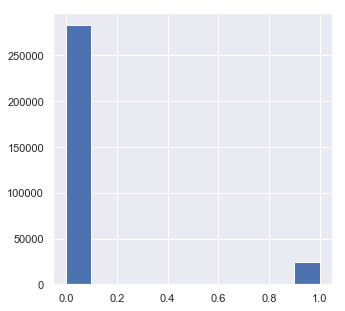

In [10]:
# Distribution of target variables
train.TARGET.hist(figsize=[5,5])


#### Distribution of target variables are not balanced as well, so we need to do some operations. 

##### We need to deal with category variables. We will use both LabelEncoder (for columns with two catergories) and OneHotEncoder ( for the rest)


In [47]:
train= application_train.copy()
test = application_test.copy()
#pd.get_dummies(train).shape, pd.get_dummies(test).shape

In [48]:
def encode(df):
    le = LabelEncoder()
    oe = OneHotEncoder()
    le_col=[]
    for col in df:
        if df[col].dtype =="object":
            if df[col].nunique()==2:
                df[col].replace(np.nan, "NAN", inplace=True)
                le_col.append(col)
                le.fit(df[col])
                df[col] = le.transform(df[col])
    print("These {} columns ({}) are label encoded".format(len(le_col), le_col))
    print("Dimensions before OneHotEncoding : {}".format(df.shape))
    df = pd.get_dummies(df)
    print("Dimensions after OneHotEncoding : {}".format(df.shape))
    
    return df
                
train =encode(train)
train.head()


These 4 columns (['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']) are label encoded
Dimensions before OneHotEncoding : (307511, 122)
Dimensions after OneHotEncoding : (307511, 242)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,1,0,0,0,0,0,0,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,1,0,0,0,0,0,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
test = encode(test)
test.head()

These 5 columns (['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']) are label encoded
Dimensions before OneHotEncoding : (48744, 121)
Dimensions after OneHotEncoding : (48744, 237)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,1,0,0,0,0,0,0,0,1,0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0,0,0,0,0,0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,1,0,0,0,0,0,0,1,0,0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0,0,0,0,0,0


#### It looks like the dimensions of train and test data are not same, which is because of some categorical object didn't show up in the test data. So we need to aling train and test data. 

In [14]:
def align(train, test):
    
    print(" Shape of train data before alinging: {}".format(train.shape),"\n", 
         "Shape of test data before alinging: {}".format(test.shape))
    target = train["TARGET"]
    train, test = train.align(test, join="inner", axis =1)
    train["TARGET"] = target
    print(" Shape of train data after alinging: {}".format(train.shape), "\n", 
     "Shape of test data after alinging: {}".format(test.shape))
    return train, test
train, test = align(train, test)

 Shape of train data before alinging: (307511, 242) 
 Shape of test data before alinging: (48744, 237)
 Shape of train data after alinging: (307511, 237) 
 Shape of test data after alinging: (48744, 236)


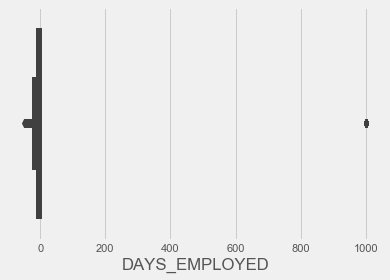

In [107]:
sns.boxplot(x= train['DAYS_EMPLOYED']/365)

#### Anomalies in Data

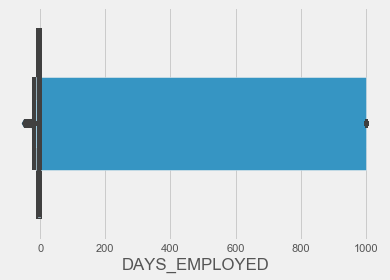

In [97]:
sns.boxenplot(x= train['DAYS_EMPLOYED']/365);sns.boxplot(x= train['DAYS_EMPLOYED']/365)

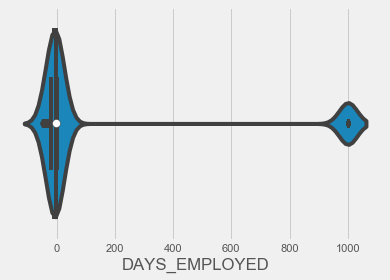

In [110]:
sns.violinplot(x= train['DAYS_EMPLOYED']/365);sns.boxplot(x= train['DAYS_EMPLOYED']/365)

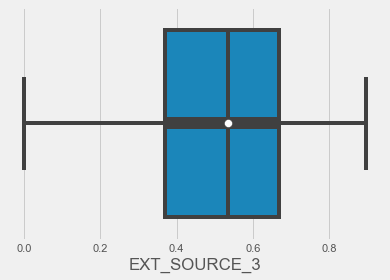

In [111]:
sns.violinplot(x= train['EXT_SOURCE_3']);sns.boxplot(x= train['EXT_SOURCE_3'])

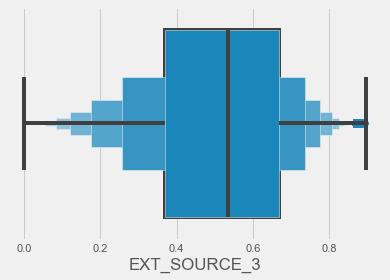

In [93]:
sns.boxenplot(x= train['EXT_SOURCE_3']);sns.boxplot(x= train['EXT_SOURCE_3'])

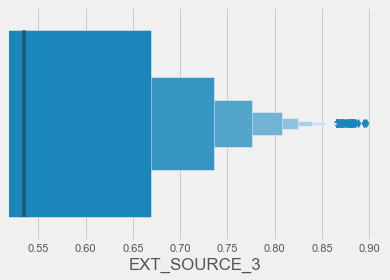

In [94]:
sns.boxenplot(x= train['EXT_SOURCE_3'])

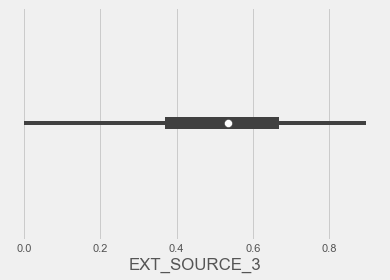

In [98]:
sns.violinplot(x= train['EXT_SOURCE_3'])

There are more than 100 features, so checking the description of each column to find anomalies is not feasible. Fishing out the outliers by z-score could be a way to go, but there are some features such as income and debt which contain values significantly higher than the mean, and these are real! 

In [15]:
train['DAYS_EMPLOYED'].describe()


count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5,0,'Employment Years')

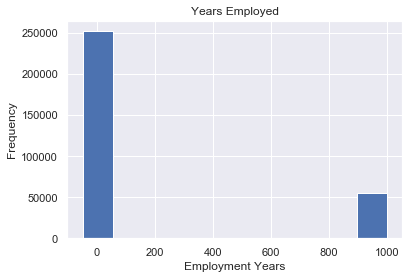

In [16]:
(train['DAYS_EMPLOYED']/365).plot.hist(title ="Years Employed")
plt.xlabel("Employment Years")


In [17]:
# Employment 1000 Years doesn't make sense, so 

Text(0.5,1,'Distribution of Years Employed')

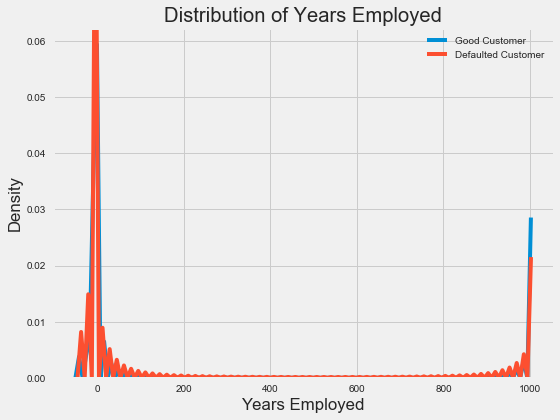

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize =(8,6))
sns.kdeplot(train.loc[train["TARGET"]==0,'DAYS_EMPLOYED']/365, label ="Good Customer")
sns.kdeplot(train.loc[train["TARGET"]==1,'DAYS_EMPLOYED']/365, label ="Defaulted Customer")

plt.xlabel("Years Employed")
plt.ylabel("Density")
plt.title("Distribution of Years Employed")


In [19]:
# Making a new column for anomalies and replacing it with NaN
def anomaly_correction(df, feature = "DAYS_EMPLOYED", integer=365243):
    df['anl'] = (df[feature]==integer).astype(int)

    df[feature].replace({integer: np.nan}, inplace =True )
    return df
train = anomaly_correction(train, feature = "DAYS_EMPLOYED", integer=365243)
test = anomaly_correction(test, feature = "DAYS_EMPLOYED", integer=365243)

In [45]:
def kdeplot(df, feature_list = None, plot_style = 'fivethirtyeight' ): 
    plt.style.use(plot_style)
    plt.figure(figsize =(12,14))
    for idx, ft in enumerate(feature_list):
        plt.subplot(len(feature_list),1, idx+1)
        one = (df.loc[df["TARGET"]==1, ft]).max()
        zero = (df.loc[df["TARGET"]==0, ft]).max()
        ymax = max(one,zero)
        sns.kdeplot(df.loc[df["TARGET"]==1, ft], shade =True, cut =0, label ="Defaulted Client (1)")
        
        sns.kdeplot(df.loc[df["TARGET"]==0, ft], shade =True, cut =0, label ="Good Client (0)")
        
        one = (df.loc[df["TARGET"]==1, ft]).max()
        zero = (df.loc[df["TARGET"]==0, ft]).max()
        ymax = max(one,zero)
        #plt.ylim(0,ymax)
        plt.title("Distribution of {} ".format(ft))
        plt.xlabel("{}".format(ft))
        plt.ylabel("Distributions")


    plt.tight_layout(pad=1.8,h_pad = 2.5, rect =(0,0,1,1))



In [115]:
train.loc[train["TARGET"]==1,['EXT_SOURCE_1', 'EXT_SOURCE_2']].head()

,EXT_SOURCE_1,EXT_SOURCE_2
0,0.083008,0.262939
26,NaN,0.548340
40,NaN,0.306885
42,0.468262,0.674316
81,NaN,0.023956


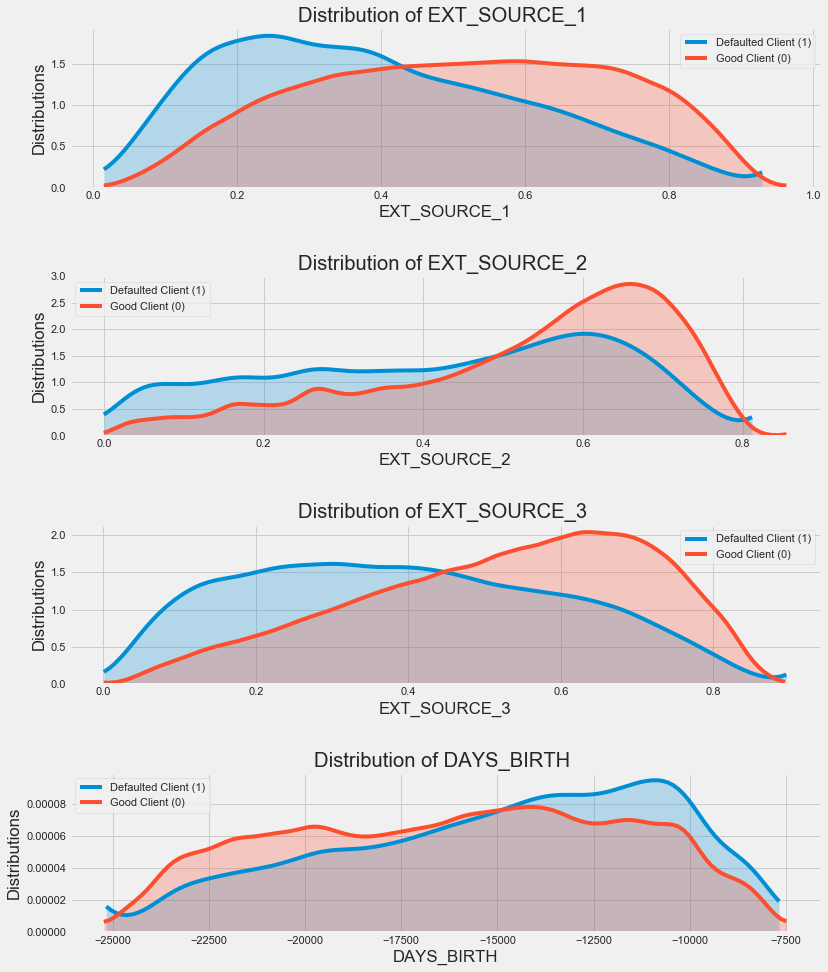

In [21]:
kdeplot(train, feature_list = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH'])

In [23]:
def kde_2D(df, feature_list = None, plot_style = 'fivethirtyeight' ): 
    plt.style.use(plot_style)
    plt.figure(figsize =(12,14))
    for idx, ft in enumerate(feature_list):
        plt.subplot(len(feature_list),1, idx+1)
        one = (df.loc[df["TARGET"]==1, ft]).max()
        zero = (df.loc[df["TARGET"]==0, ft]).max()
        ymax = max(one,zero)
        sns.kdeplot(df.loc[df["TARGET"]==1, ft], df.loc[df["TARGET"]==1, feature_list[idx+1]], shade =True, cut =0, label ="Defaulted Client (1)")
        
        #sns.kdeplot(df.loc[df["TARGET"]==0, ft], shade =True, cut =0, label ="Good Client (0)")
        
        one = (df.loc[df["TARGET"]==1, ft]).max()
        zero = (df.loc[df["TARGET"]==0, ft]).max()
        ymax = max(one,zero)
        #plt.ylim(0,ymax)
        plt.title("Distribution of {} ".format(ft))
        plt.xlabel("{}".format(ft))
        plt.ylabel("Distributions")


    plt.tight_layout(pad=1.8,h_pad = 2.5, rect =(0,0,1,1))

In [36]:

tr1, tr2


(0         0.262939
 26        0.548340
 40        0.306885
 42        0.674316
 81        0.023956
 94        0.432373
 110       0.281982
 138       0.631836
 154       0.182129
 163       0.086243
 180       0.372070
 184       0.500000
 211       0.044006
 235       0.126343
 242       0.523438
 246       0.710938
 255       0.302490
 260       0.474854
 261       0.253174
 283       0.063477
 291       0.628906
 344       0.293945
 348       0.622559
 368       0.500488
 381       0.482178
 389       0.266602
 408       0.365723
 413       0.616211
 419       0.335938
 424       0.281738
             ...   
 307123    0.651367
 307126    0.470947
 307133    0.007366
 307162    0.400635
 307177    0.778809
 307183    0.519531
 307248    0.067627
 307256    0.505859
 307266    0.616211
 307268    0.162231
 307283    0.168091
 307285    0.072937
 307288    0.291748
 307310    0.005428
 307323    0.054260
 307328    0.581543
 307363    0.266602
 307377    0.163208
 307383    0.146729


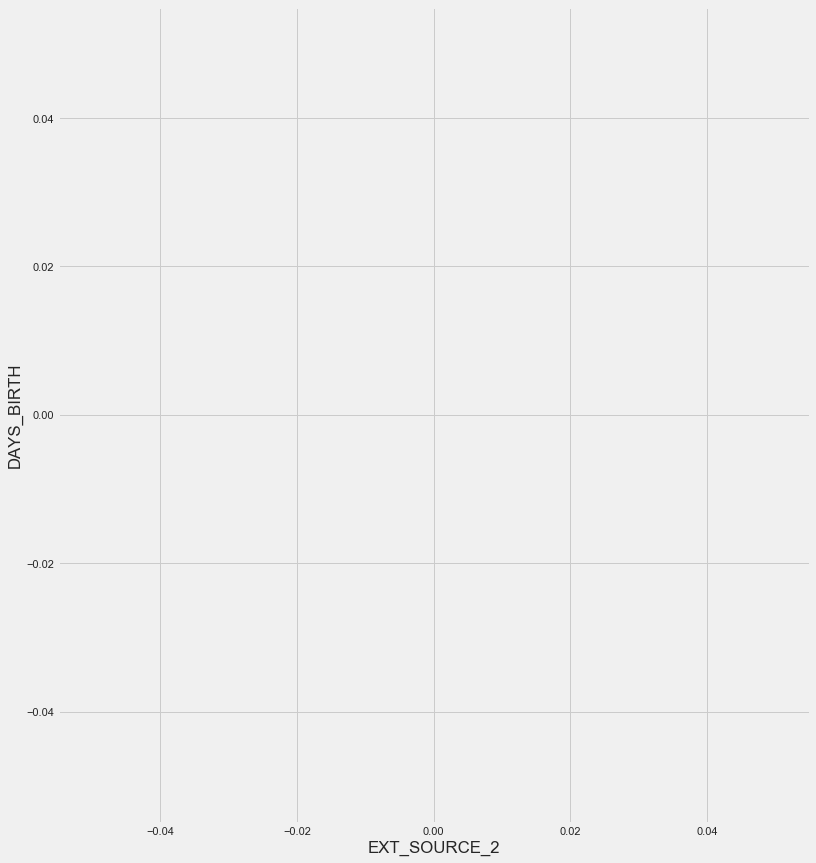

In [42]:
tr1= train.loc[train["TARGET"]==1, 'EXT_SOURCE_2']
tr2=train.loc[train["TARGET"]==1, 'DAYS_BIRTH']
plt.figure(figsize =(12,14))

sns.kdeplot(tr1, tr2, cmap="Reds", shade=True, shade_lowest=False, label ="Defaulted Client (1)")
        
    

IndexError: list index out of range

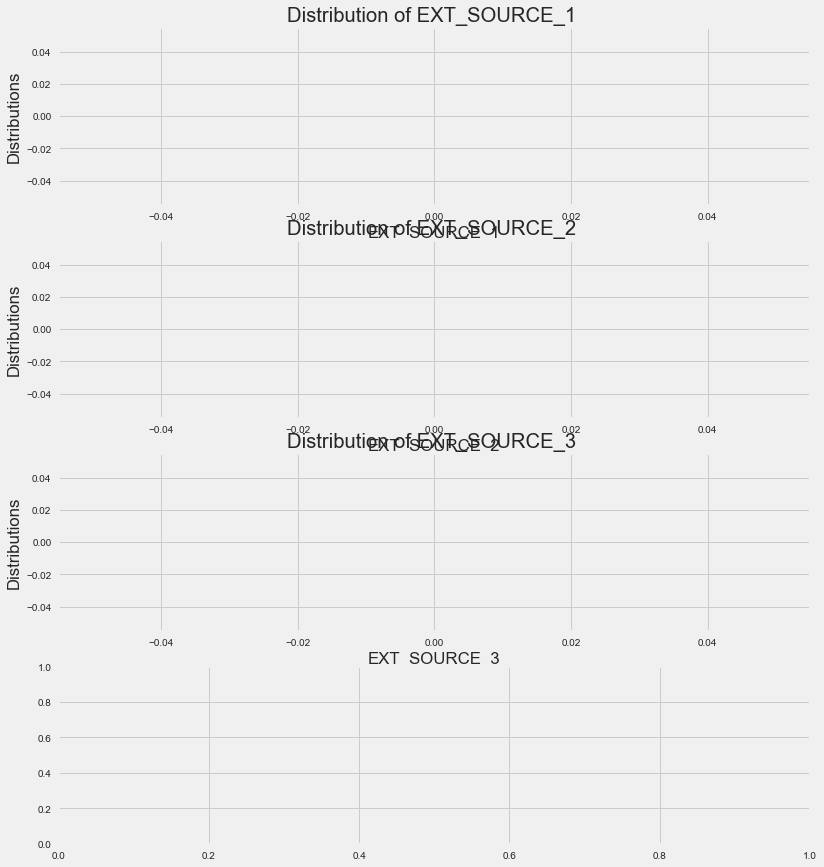

In [24]:
kde_2D(train, feature_list = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH'])

In [ ]:
from scipy import stats
train[(np.abs(stats.zscore(train)) > 5)].describe()

In [ ]:
stds = 1.0
outliers = df[['G1', 'G2', 'Value']].groupby(['G1','G2']).transform(
           lambda group: (group - group.mean()).abs().div(group.std())) > stds

In [ ]:
np.mean(train.AMT_INCOME_TOTAL), np.std(train.AMT_INCOME_TOTAL)

In [ ]:
train.AMT_INCOME_TOTAL[np.abs(stats.zscore(train.AMT_INCOME_TOTAL))].head()

In [ ]:
# Here I am building a pipeline

from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import Imputer

nulls_per_column = train.isnull().sum()
categorical_feature_mask = train.dtypes == object

categorical_columns = train.columns[categorical_feature_mask].tolist()
non_categorical_columns = train.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper([(numeric_feature,Imputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper([(category_feature, CategoricalImputer()) for category_feature in categorical_columns],
                                                input_df=True,
                                                df_out=True
                                               )


# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])


In [ ]:
numeric_categorical_union
categorical_imputation_mapper

In [ ]:
# Create full pipeline
pipeline = Pipeline([
                     ("featureunion", numeric_categorical_union),
                     ("dictifier", Dictifier()),
                     ("vectorizer", DictVectorizer(sort=False)),
                     ("clf", xgb.XGBClassifier(max_depth=3))
                    ])

### Distribution of target variables in each of the columns in the training dataset

In [ ]:
# Let's see